## Obtaining our data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load in pima-indians-diabetes data
diabetes_df = pd.read_csv("diabetes.csv")
#print the first 5 rows
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Basic EDA and statistical analysis

In [12]:
diabetes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


one can remark 0 values(min) which is unvalid for Glucose, BloodPressure, SkinThickness, etc.
<br/>-> they need to be replaced

In [15]:
diabetes_df2 = diabetes_df.copy(deep=True)
diabetes_df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = diabetes_df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.NaN)

# check the count of NaNs
print(diabetes_df2.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


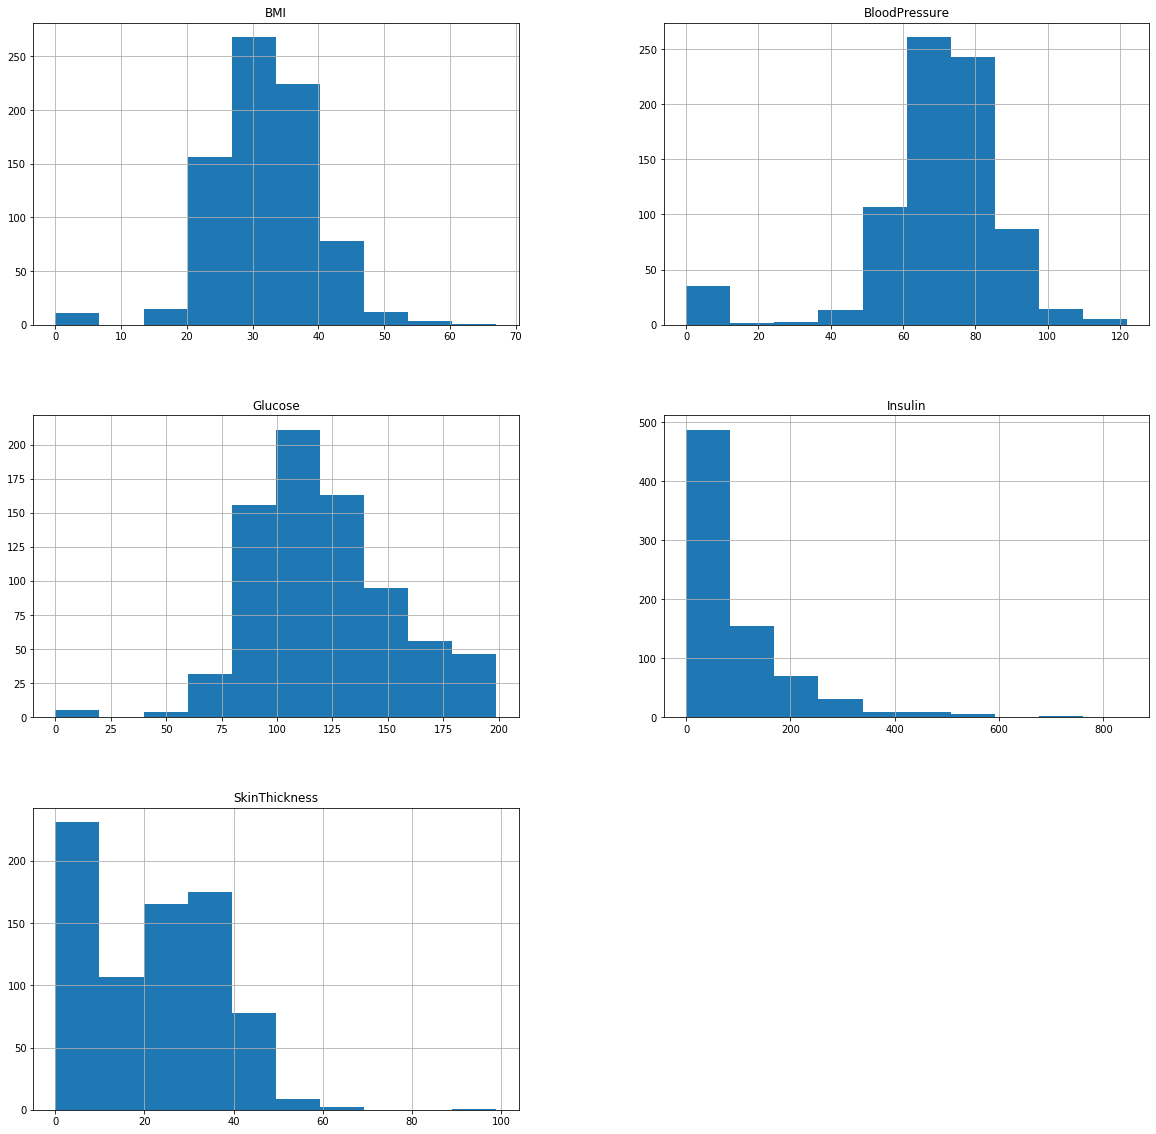

In [18]:
# check distributions of each column
p = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].hist(figsize=(20,20))

In [19]:
#replace NaN value with median value
diabetes_df2['Glucose'].fillna(diabetes_df2['Glucose'].mean(), inplace=True)
diabetes_df2['BloodPressure'].fillna(diabetes_df2['BloodPressure'].mean(), inplace=True)
diabetes_df2['SkinThickness'].fillna(diabetes_df2['SkinThickness'].mean(), inplace=True)
diabetes_df2['Insulin'].fillna(diabetes_df2['Insulin'].mean(), inplace=True)
diabetes_df2['BMI'].fillna(diabetes_df2['BMI'].mean(), inplace=True)

### Check distributions of columns after replacing NaN value with median value

* diabetes_df: original dataframe
* diabetes_df2: replaced NaN values with median values

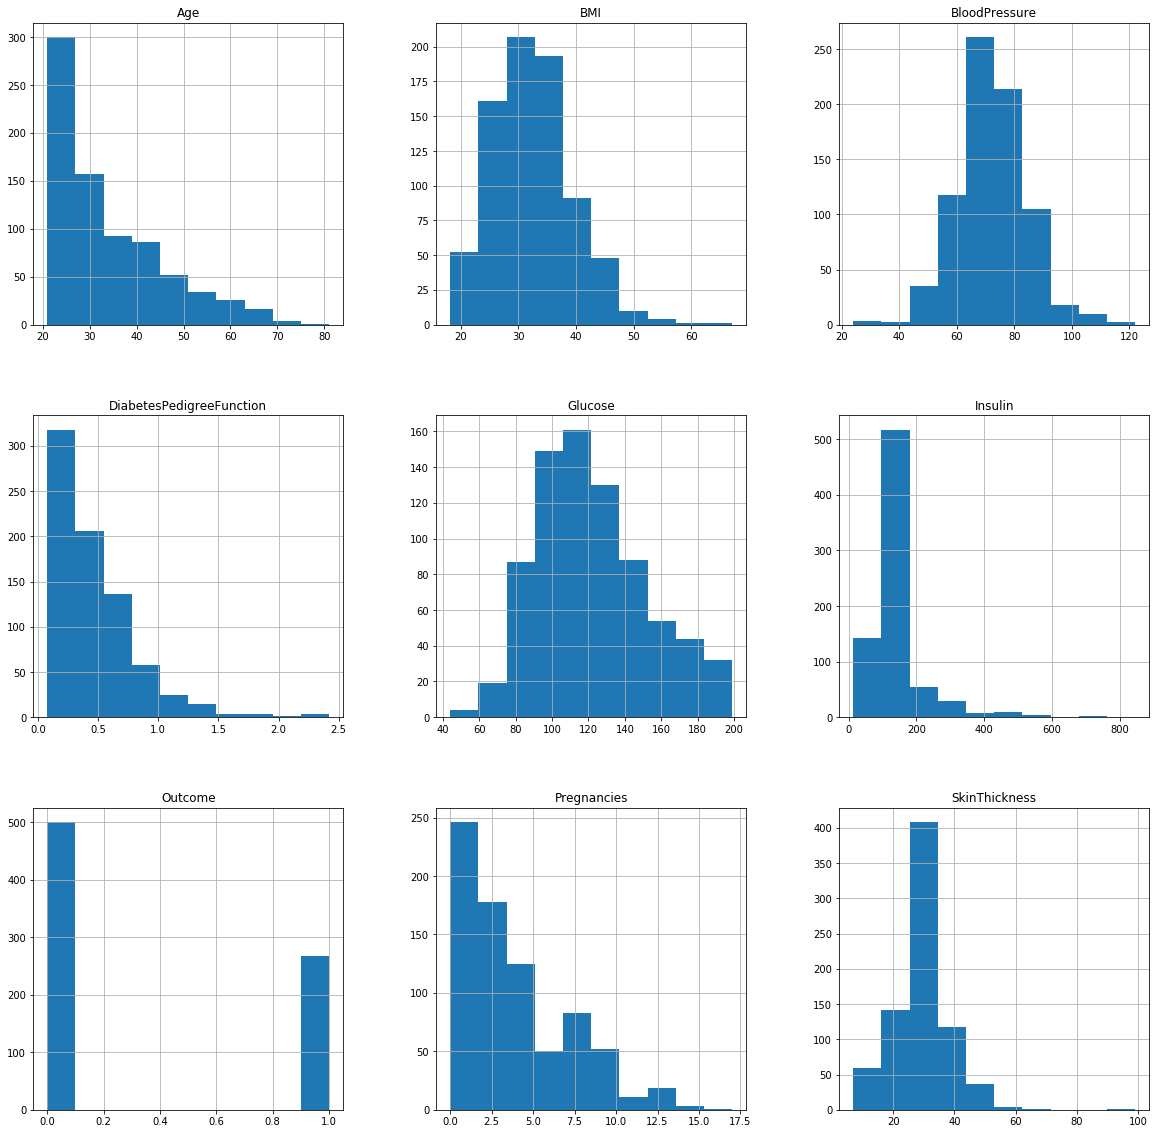

In [22]:
p = diabetes_df2.hist(figsize=(20,20))

In [6]:
#check the columns
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
# descriptive statistics summary
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [4]:
# histogram
sns.displot(df['Pregnancies'])
plt.show()
plt.clf()

AttributeError: module 'seaborn' has no attribute 'displot'